In [55]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Generate n random numbers with normal distribution(for normal distribution run this block.)
n = int(input('Enter numbers of random data you want to gerenate: '))
random_number = np.random.normal(0, 1, 1000000)
data = np.random.choice(random_number, n , replace = False)
disti = "normal"
# number of bins we want
bins = int(input('Enter the number of bins you want:'))

Enter numbers of random data you want to gerenate: 1000
Enter the number of bins you want:21


In [57]:
# Generate n random numbers with normal distribution(for normal distribution run this block.)
n = int(input('Enter numbers of random data you want to gerenate: '))
random_number = np.random.normal(0, 1, 1000000)
data = np.random.choice(random_number, n , replace = False)
disti = "normal"
# number of bins we want
bins = int(input('Enter the number of bins you want:'))

KeyboardInterrupt: Interrupted by user

In [62]:
# Calculate the bin centers and the histogram values and the bin width
hist_values, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

In [63]:
# Calculate the error for each interval
def Error_for_each_interval(data, bins, bin_edges):
  errors = []
  for i in range(bins):
    numinbins = []
    for j in data:
      if(j >= bin_edges[i]  and j <= bin_edges[i+1]):
        numinbins.append(j)
        binmid = (bin_edges[i] + bin_edges[i+1]) /2
    if len(numinbins) != 0:
      mu = binmid * len(numinbins) / (n)
      sigma2 = ((binmid**2)*len(numinbins))- (n * (mu**2)) / (n-1)
      vari = (sigma2)**(1/2)
      filter_arr = []
      for element in data:
        if element >=bin_edges[i]  and element <= bin_edges[i+1]:
          filter_arr.append(element)
      # Remove Probability < 0
      if (len(filter_arr) - vari) <= 0:
          vari = len(filter_arr)
      errors.append(vari)
    if len(numinbins) == 0:
      errors.append(0.0)
  errors = np.array(errors)
  return errors

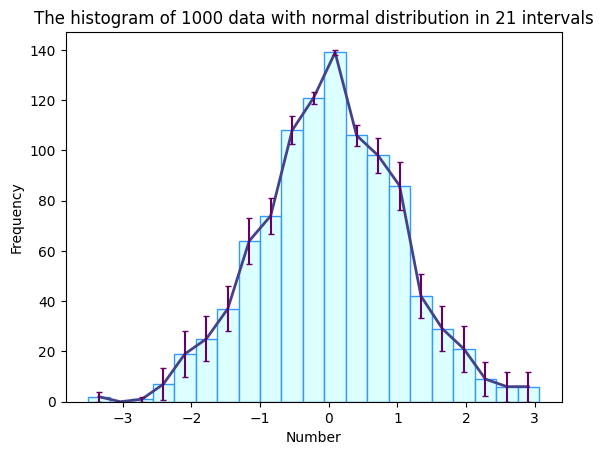

In [64]:
# Create the histogram
def plot(x,bins,bin_centers, hist_values,yerrors):

  plt.hist(x, bins=bins , color='#DCFFFF' , edgecolor='#3399FF')

  # Plot the distribution function
  plt.plot(bin_centers, hist_values, '#43438A', linewidth=2)

  # Plot the error bars
  plt.errorbar(bin_centers, hist_values, yerr=yerrors, fmt='none', color='#660066', capsize=2)

  # Set the labels and title
  plt.xlabel('Number')
  plt.ylabel('Frequency')
  plt.title(f'The histogram of {n} data with {disti} distribution in {bins} intervals')

  # Display the plot
  plt.show()

plot(data, bins,bin_centers,hist_values , Error_for_each_interval(data, bins, bin_edges))